# Actual model connectivity 
## biophysical connvergence

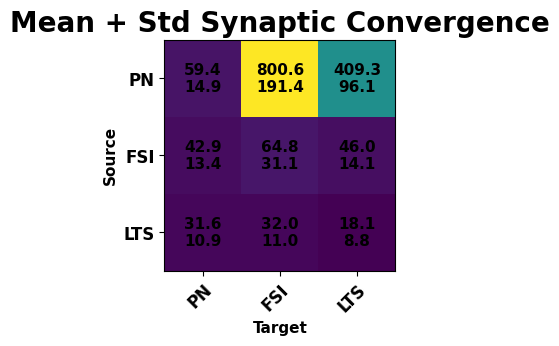

In [3]:
from bmtool import bmplot as bp

bp.convergence_connection_matrix(config="../Network-Parameters/config_baseline.json",sources='cortex',targets='cortex',sids='pop_name',tids='pop_name',no_prepend_pop=True)

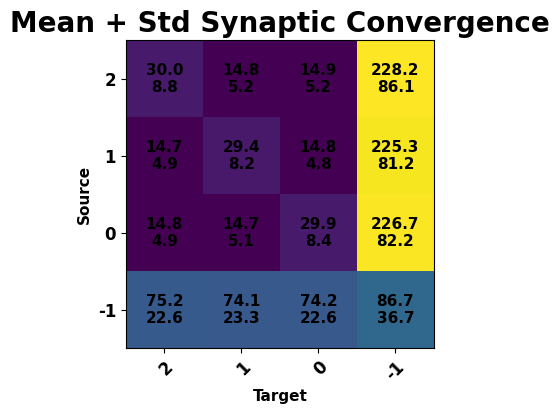

In [5]:
bp.convergence_connection_matrix(config="../Network-Parameters/config_baseline.json",sources='cortex',targets='cortex',sids='assembly_id',tids='assembly_id',no_prepend_pop=True)

## Shell convergence 

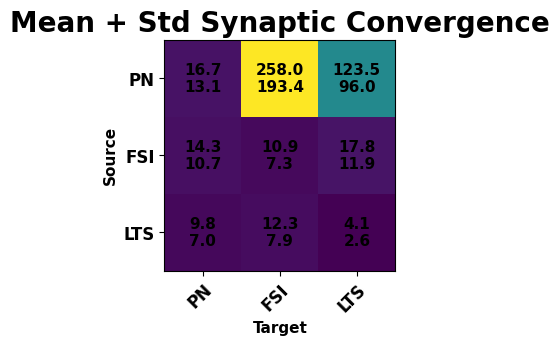

In [3]:
bp.convergence_connection_matrix(config="../Network-Parameters/config_baseline.json",sources='shell',targets='cortex',sids='pop_name',tids='pop_name',no_prepend_pop=True)

## Distance depended percent connectivity 
### This is a measure of on average out of the total number of cells an indivual cell could connect to within its distance rule

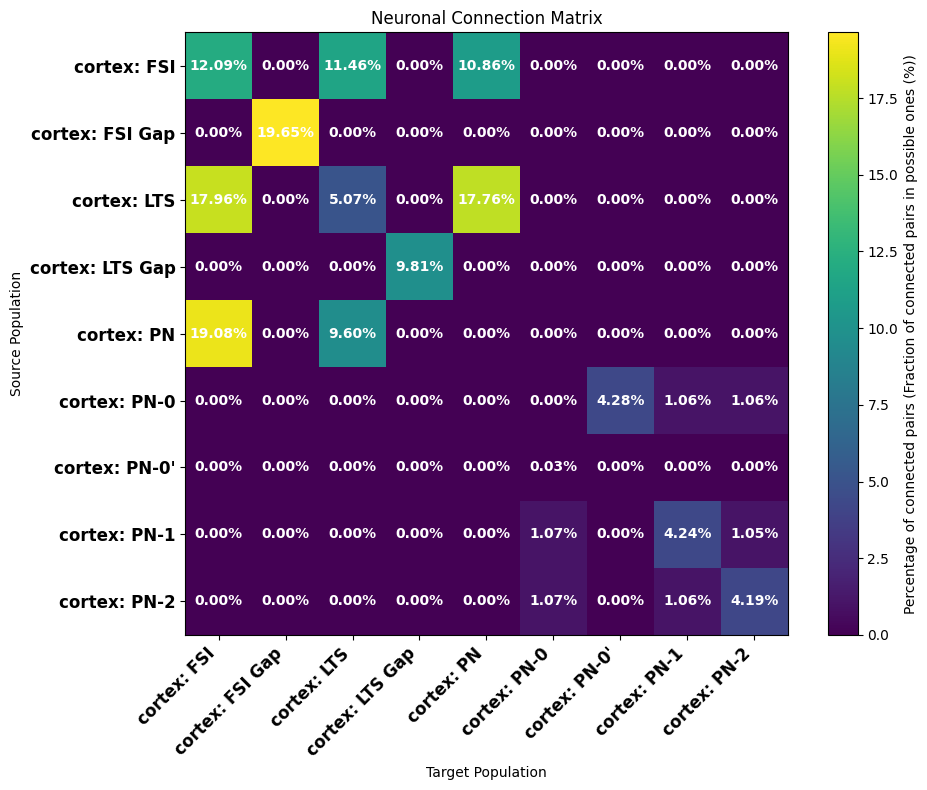

In [1]:
from bmtool import bmplot
bmplot.connector_percent_matrix(csv_path='../Network-Parameters/connection_report.csv',exclude_shell_connections=True)

In [ ]:
from bmtool import bmplot as bp
#bp.probability_connection_matrix(config="../../Network-Parameters/config_baseline.json",sources='cortex',targets='cortex',sids='pop_name',tids='pop_name',no_prepend_pop=True,line_plot=True)

In [1]:
from bmtool import graphs
import networkx as nx

Graph = graphs.generate_graph(config="../../Network-Parameters/config_baseline.json",source='cortex',target='cortex')

In [2]:
import networkx as nx
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.spatial.distance import cdist

def create_test_graph(num_nodes=500, distance_threshold=100, Pmax=1.0, sigma=20.0):
    """Create a test graph with nodes connected based on a Gaussian distance-dependent probability."""
    G = nx.DiGraph()
    np.random.seed(42)  # For reproducibility
    
    # Generate random positions for the nodes
    positions = np.random.rand(num_nodes, 3) * 100  # Positions in a 100x100x100 space
    labels = np.random.choice(['A', 'B'], size=num_nodes)  # Randomly assign population labels 'A' or 'B'
    
    # Add nodes to the graph
    for i in range(num_nodes):
        G.add_node(i, pos=positions[i], label=labels[i])
    
    # Add edges based on the distance-dependent probability
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                distance = np.linalg.norm(positions[i] - positions[j])
                if distance <= distance_threshold:
                    probability = Pmax * np.exp(-(distance**2) / (2 * sigma**2))
                    if np.random.rand() < probability:
                        G.add_edge(i, j)
    
    return G, positions

def gaussian_decay(distance, Pmax, sigma):
    """Gaussian decay function."""
    return Pmax * np.exp(-(distance**2) / (2 * sigma**2))

def estimate_parameters(G, distance_threshold=100):
    """Estimate Pmax and sigma for each population pair in the graph."""
    node_positions = nx.get_node_attributes(G, 'pos')
    node_labels = nx.get_node_attributes(G, 'label')
    nodes = list(node_positions.keys())
    positions = np.array([node_positions[node] for node in nodes])
    labels = [node_labels[node] for node in nodes]
    
    distances_dict = {}
    probabilities_dict = {}
    
    # Collect distances and probabilities for each population pair
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if i != j:
                distance = np.linalg.norm(positions[i] - positions[j])
                if distance <= distance_threshold:
                    source_label = labels[i]
                    target_label = labels[j]
                    population_pair = (source_label, target_label)
                    
                    if population_pair not in distances_dict:
                        distances_dict[population_pair] = []
                        probabilities_dict[population_pair] = []
                    
                    distances_dict[population_pair].append(distance)
                    probabilities_dict[population_pair].append(1 if G.has_edge(i, j) else 0)
    
    # Estimate parameters for each population pair
    estimates = {}
    for population_pair in distances_dict.keys():
        distances = np.array(distances_dict[population_pair])
        probabilities = np.array(probabilities_dict[population_pair])
        
        popt, _ = curve_fit(gaussian_decay, distances, probabilities, p0=[0.5, 100.0])
        Pmax_est, sigma_est = popt
        
        estimates[population_pair] = (Pmax_est, sigma_est)
    
    return estimates

# Create an example graph
num_nodes = 200
distance_threshold = 400
Pmax = 0.5
sigma = 200.0

G, positions = create_test_graph(num_nodes=num_nodes, distance_threshold=distance_threshold, Pmax=Pmax, sigma=sigma)

# Estimate Pmax and sigma for each population pair
estimates = estimate_parameters(Graph, distance_threshold=distance_threshold)
print(estimates)


{('PN', 'PN'): (0.07819621002901213, 99.44975696128638), ('PN', 'FSI'): (0.7273734067995593, 118.95855780666578), ('PN', 'LTS'): (0.3617656686764082, 119.30813609863452), ('FSI', 'PN'): (0.5916824426256566, 95.97194846674513), ('FSI', 'FSI'): (0.4908687839569687, 119.61563403971121), ('FSI', 'LTS'): (0.3630134781803959, 124.62475654117371), ('LTS', 'PN'): (0.9180791856978898, 98.0436109699204), ('LTS', 'FSI'): (0.5622727665528198, 124.77982841258202), ('LTS', 'LTS'): (0.5262475143336854, 93.31777553476478)}


This did an ok job at estimating Pmax and sigma. The values are fairly close to what is defined in the build_network. There are most like issues like with edge effect neurons but overall i think the build network distro is ~mostly fitted in the actually model with some degree of error but whatever.

In [2]:
from bmtool.util.util import load_nodes_from_config,load_nodes_from_paths

#nodes = load_nodes_from_paths([{'nodes_file': '/home/gjgpb9/L2-3-Model/Network-Parameters/network_rotated/cortex_nodes.h5', 'node_types_file': '/home/gjgpb9/L2-3-Model/Network-Parameters/network_rotated/cortex_node_types.csv'}])
nodes = load_nodes_from_config("../Network-Parameters/config_baseline.json")

In [4]:
nodes['cortex']

,node_type_id,model_type,model_template,pop_name,morphology,pos_x,pos_y,pos_z,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis
node_id,,,,,,,,,,,
0,100,biophysical,hoc:CP_Cell,PN,blank.swc,204.561437,55.781565,96.544312,0.0,1.531130,1.459470
1,100,biophysical,hoc:CP_Cell,PN,blank.swc,-192.090770,265.664103,-62.992757,0.0,1.183618,1.191713
2,100,biophysical,hoc:CP_Cell,PN,blank.swc,-24.524847,-164.618108,1.999565,0.0,1.306221,1.190775
3,100,biophysical,hoc:CP_Cell,PN,blank.swc,267.163374,-286.979229,-65.277127,0.0,1.155872,1.123580
4,100,biophysical,hoc:CP_Cell,PN,blank.swc,-234.415651,-148.465761,-47.284553,0.0,1.234159,1.126005
...,...,...,...,...,...,...,...,...,...,...,...
9995,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,246.302714,22.095008,-44.284092,0.0,0.332898,0.373644
9996,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,57.752117,24.098235,114.685873,0.0,1.241381,3.510785
9997,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,254.315172,-153.847806,-19.902274,0.0,0.068764,3.984983


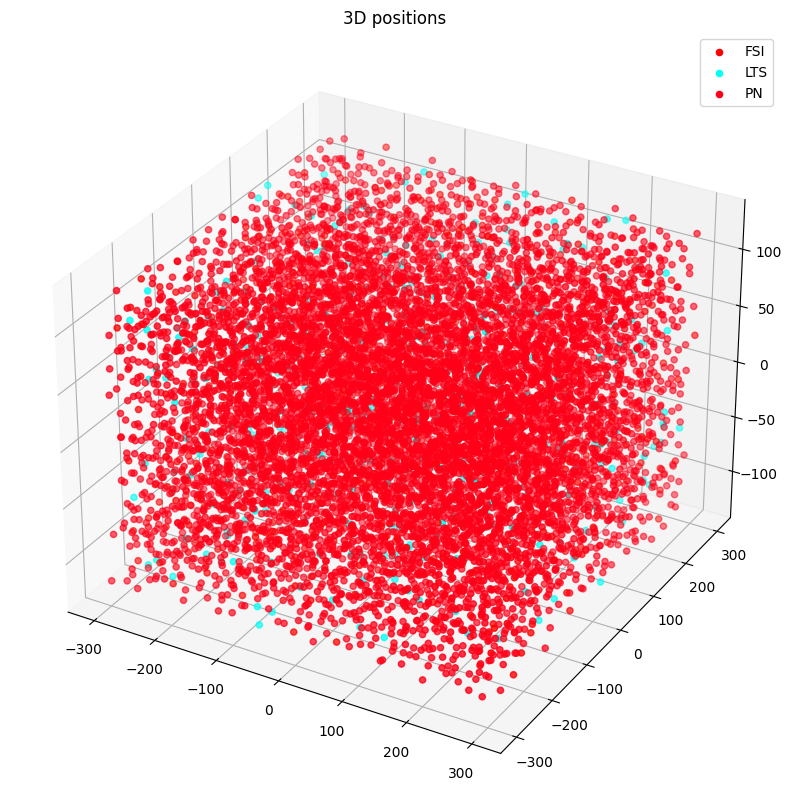

In [1]:
from bmtool import bmplot as bp
bp.plot_3d_positions(config="../Network-Parameters/config_baseline.json",populations_list='cortex',group_by='pop_name')

,node_type_id,model_type,model_template,pop_name,morphology,pos_x,pos_y,pos_z,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis
node_id,,,,,,,,,,,
8700,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-229.623869,258.049222,-119.651375,0.0,2.962410,2.293033
8701,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,194.440630,-236.254833,-28.374638,0.0,4.674000,4.616000
8702,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-279.058018,90.460009,-74.105640,0.0,1.173492,4.657174
8703,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,66.735643,-87.195927,-25.445203,0.0,2.447247,3.902217
8704,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-210.705068,-263.948482,-43.084572,0.0,5.784014,3.689190
...,...,...,...,...,...,...,...,...,...,...,...
9595,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,155.877601,268.376515,-88.235259,0.0,2.585879,3.597178
9596,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,55.730094,10.449233,-111.659098,0.0,0.620678,5.022221
9597,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,47.043234,244.416309,24.658470,0.0,5.870475,1.839334


,node_type_id,model_type,model_template,pop_name,morphology,pos_x,pos_y,pos_z,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis
node_id,,,,,,,,,,,
8700,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-229.623869,258.049222,-119.651375,0.0,2.962410,2.293033
8701,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,194.440630,-236.254833,-28.374638,0.0,4.674000,4.616000
8702,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-279.058018,90.460009,-74.105640,0.0,1.173492,4.657174
8703,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,66.735643,-87.195927,-25.445203,0.0,2.447247,3.902217
8704,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-210.705068,-263.948482,-43.084572,0.0,5.784014,3.689190
8705,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,-151.603225,241.631542,-51.585263,0.0,3.258017,2.623102
8706,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,15.404983,-21.025130,-26.875375,0.0,5.672801,3.890203
8707,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,178.243174,205.176272,-72.962260,0.0,2.985453,2.234992
8708,101,biophysical,hoc:FSI_Cell,FSI,blank.swc,90.285810,-0.677233,114.762642,0.0,0.650534,1.961111


,node_type_id,model_type,model_template,pop_name,morphology,pos_x,pos_y,pos_z,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis
node_id,,,,,,,,,,,
9600,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,-235.420100,-63.068178,-83.143215,0.0,4.007461,5.698393
9601,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,231.330285,181.305779,-10.635334,0.0,0.709339,0.124387
9602,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,-146.242221,74.057237,6.803230,0.0,5.135960,5.119189
9603,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,-84.062579,-206.272535,9.382878,0.0,3.750040,5.162937
9604,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,136.631404,-208.376037,52.068535,0.0,0.810251,4.569885
...,...,...,...,...,...,...,...,...,...,...,...
9995,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,246.302714,22.095008,-44.284092,0.0,0.332898,0.373644
9996,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,57.752117,24.098235,114.685873,0.0,1.241381,3.510785
9997,102,biophysical,hoc:LTS_Cell,LTS,blank.swc,254.315172,-153.847806,-19.902274,0.0,0.068764,3.984983


,node_type_id,model_type,model_template,pop_name,morphology,pos_x,pos_y,pos_z,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis
node_id,,,,,,,,,,,
0,100,biophysical,hoc:CP_Cell,PN,blank.swc,204.561437,55.781565,96.544312,0.0,1.531130,1.459470
1,100,biophysical,hoc:CP_Cell,PN,blank.swc,-192.090770,265.664103,-62.992757,0.0,1.183618,1.191713
2,100,biophysical,hoc:CP_Cell,PN,blank.swc,-24.524847,-164.618108,1.999565,0.0,1.306221,1.190775
3,100,biophysical,hoc:CP_Cell,PN,blank.swc,267.163374,-286.979229,-65.277127,0.0,1.155872,1.123580
4,100,biophysical,hoc:CP_Cell,PN,blank.swc,-234.415651,-148.465761,-47.284553,0.0,1.234159,1.126005
...,...,...,...,...,...,...,...,...,...,...,...
8695,100,biophysical,hoc:CP_Cell,PN,blank.swc,203.175536,214.286523,-57.789268,0.0,1.255814,1.438590
8696,100,biophysical,hoc:CP_Cell,PN,blank.swc,-213.763457,-199.438424,-16.159356,0.0,1.489638,1.525355
8697,100,biophysical,hoc:CP_Cell,PN,blank.swc,6.175630,-141.458336,-115.609494,0.0,1.303302,1.156841


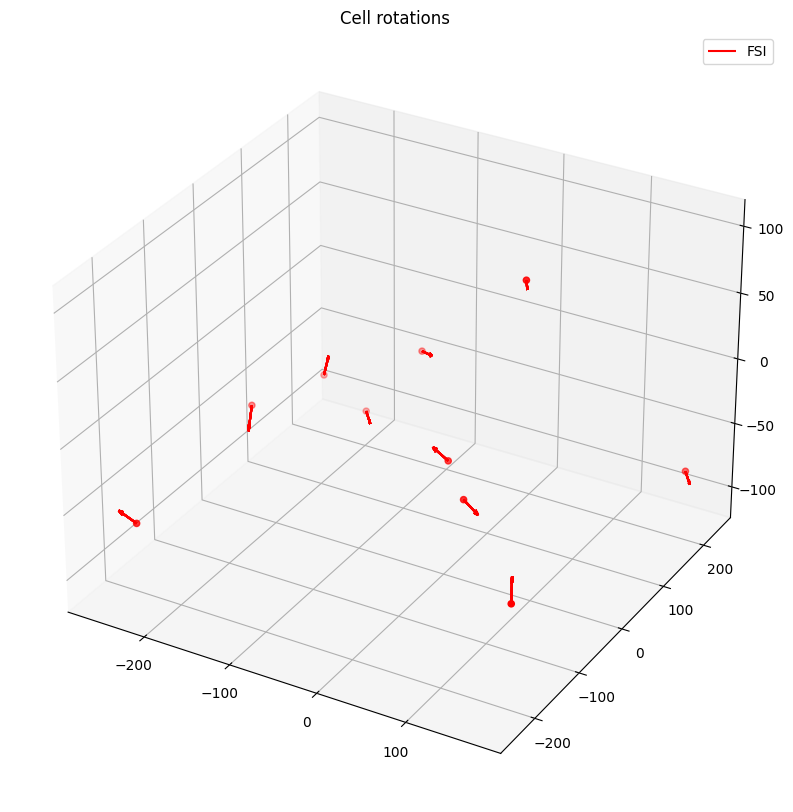

In [1]:
from bmtool import bmplot as bp
bp.cell_rotation_3d(config="../Network-Parameters/config_baseline.json",populations_list='cortex',group_by='pop_name',save_file=False,quiver_length=20,arrow_length_ratio=0.25,max_cells=10)